<a href="https://colab.research.google.com/github/hl105/deep-learning-practice/blob/main/singleLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(8816, 785)
[0 1]
(6612, 784)
(2204, 784)
(6612,)
(2204,)
Values before rescaling:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225

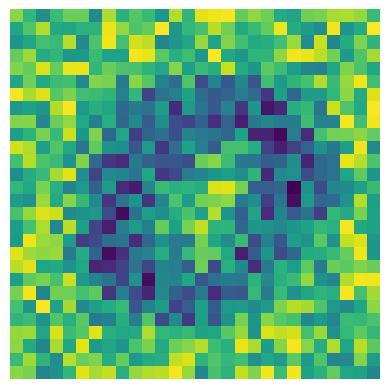

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# binary classifications (0 and 1) using a single layer perceptron.
# extrack data with digit 0 and 1


def forward_propagation(x,y,weights,bias):
  # x: training data as verctory nparray
  # y: binary label

  y_pred = predict(x,weights,bias)
  loss = (y_pred - y)**2 #we want to minimize this
  d_loss = 2*(y_pred - y) #derivative (useful for backpropagation)

  return y_pred, loss, d_loss

# Backpropagation: gradient based learning
# multiply the gradient of each layer to obtain the whole gradient: chain rule
def backpropagation(x, d_loss):
  gradients = list()
  for feature_value in x:
    gradients.append(d_loss*feature_value)
  return gradients

# Optimization: optimizes the perceptron's weights every epoch
def optimization(x,y, learning_rate):
  epoch = 0
  error = 999

  #initialize wieght and bias randomly
  weights = np.random.rand(x.shape[1])
  bias = np.random.rand()

  #keep track
  errors = list()
  epochs = list()

  while(epoch <=30) and (error > 9e-4):
    total_loss = 0
    for i in range(x.shape[0]):
      #forward propagation
      y_pred, loss, d_loss = forward_propagation(x[i],y[i],weights, bias)
      #backpropagation
      gradients = backpropagation(x[i], d_loss)
      #update weights
      weights = weights - (learning_rate*np.array(gradients))

    #evaluation
    for index, feature_value_test in enumerate(x):
      y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
      total_loss += loss

    errors.append(total_loss/len(x)) #MSE
    epochs.append(epoch)
    error = errors[-1]
    epoch+=1
    print(f"Epoch: {epoch}, loss: {errors[-1]}")

  return weights, bias, errors

def activation_function(prediction):
  #gets output(prediction) of perceptron's function & applies activation function
  #maps negative outputs to 0 & positive outputs to 1
  if prediction >= 0:
    return 1
  return 0

def predict(x, weights, bias):
  #predicts label of data point x by applying perceptron's & activation f
  prediction = np.dot(weights,x) + bias
  return activation_function(prediction)


def calculate_accuracy(x_test, y_test, weights, bias):

    # Initialize True Positive, True Negative, False Positive and False Negative
    tp, tn, fp, fn = 0, 0, 0, 0

    for sample, label in zip(x_test, y_test):

        prediction = predict(sample, weights, bias)

        if prediction == label:
            if prediction == 1:
                tp += 1
            else:
                tn += 1
        else:
            if prediction == 1:
                fp += 1
            else:
                fn += 1

    accuracy = (tp + tn)/(tp + tn + fp + fn)
    return accuracy

data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print(data.shape)
print(np.unique(data['label'].to_numpy()))


# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Values before rescaling: ', np.unique(x_train))

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.
print('Values after rescaling: ', np.unique(x_train))

weights, bias, errors = optimization(x_train, y_train, learning_rate=0.001)

acc = calculate_accuracy(x_test, y_test, weights, bias)
print('Accuracy: ', acc)

weights.resize((28, 28))
plt.imshow(weights)
plt.axis('off')
plt.show()